In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook")
#sns.set_context("poster")


In [2]:
# For this exercise you need to install yellowbrick
# it will be also useful to take a look at the documentation
#    scikit-yb.org
#
# ! pip install yellowbrick

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import preprocessing

from sklearn.datasets import load_wine
from sklearn.datasets import load_boston

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.model_selection import LearningCurve


In [3]:
! pip install yellowbrick

<h1>Clustering</h1>

Clustering is the most common and well-known unsupervised learning techniques. We can find clustring almost everywhere, in political campaigns, in client segmentation, ... The aglomeration of similar items is very familiar to us, Cities are clusters of people and in cities business traditionally cluster.

However, the fact that clustering is unsupervised poses some problems to validation metrics and verification. There is normally no grown truth, therefore there is not a single solution. Many times clusters, including its number, depends on the point of view of the problem and the questions that we are trying to address. 

The first problem that we encounter with clustering is finding out the best number of clusters. For this the elbow method is commonly used. It performs k-means with an increasingly number of clusters finding the k (number of clusters) that minimizes intra-cluster distance.

Checking the goodness is commonly done using the Silhoutte coefficient that measures the mean intra-cluster distance relative to the nearest clusters providing an appreciation of compactness. 

Clustering is very intuitive in two-dimensional spaces, but difficult to imagine in multidimensional spaces. The output of a clustering algorithm are centroids which consists of vectors with the center for each attribute. Using predict we can easily assign membership. 

Also we aware that clustering works measuring distances, therefore we need to rescaled (normally between 0..1) all the attributes. 

In this notebook we will use the UCI wine dataset, a compilation of characteristics of 178 Italian red wines divided in three families. We will see how well clustering can find without any example these three classes. 

In many cases, like this one, clustering has some coincidences with classification. This is precisely this case. When this happens we know the ground truth and therefore we can apply measures such as accuracy. However, this is uncommon, and therefore assessing its goodness is difficult. 

This notebook heavily uses the yellowbrick library, please install it with 
<p style="margin-left: 200px"> <b><i>pip install yellowbrick</i></b> </p>

<img src="wine-dataset.jpg">

In [4]:
# We use the wine dataset
wine = load_wine()

print(wine["DESCR"])


# como es dataset de scikitlearn... lo importo así. es un .data
# descr sería como el help


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,TARGET
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,TARGET
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


,alcohol
TARGET,
0,59
1,71
2,48


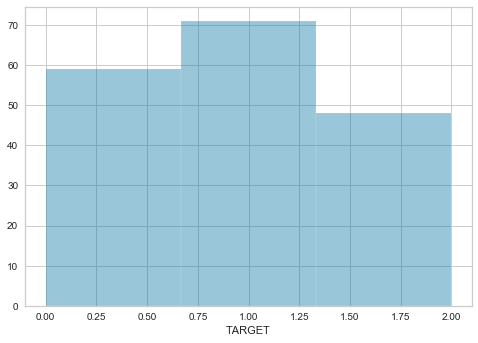

In [5]:

wine_df = pd.DataFrame(wine.data, columns=wine.feature_names) # convertir archivo formato data a df
# .data selecciono párrafo con datos en .feature_names o .feature_description
wine_df['TARGET'] = wine.target # crear columna target con el archivo target
wine_df.head()

wine_df.describe()

wine_df[["TARGET", "alcohol"]].groupby("TARGET").count() # hacer nuevo df porque quiero agrupar según criterios específicos
# para asegurar que no hace lo que le da la gana. El count te lo hará con alcohol.
# cómo afecta la cantidad de alcohol en target.

sns.distplot(wine_df["TARGET"],bins=3, kde=False)
plt.show() # añadido esto para que se vea mejor

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,TARGET
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,TARGET
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


,alcohol
TARGET,
0,59
1,71
2,48


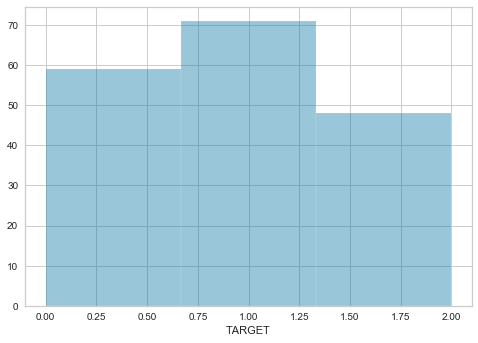

In [6]:
wine_df.head()

wine_df.describe()

wine_df[["TARGET", "alcohol"]].groupby("TARGET").count()

sns.distplot(wine_df["TARGET"],bins=3, kde=False) # seaborn no hace falta poner show.

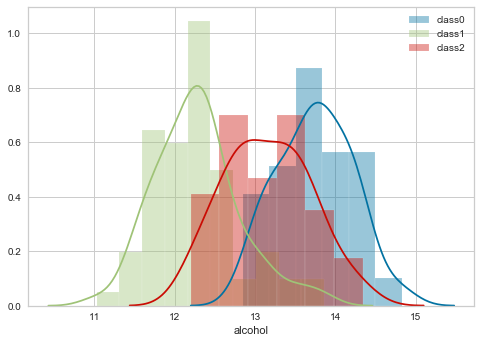

In [7]:
# let's plot the alcohol percentage for each class of wine

for i in wine_df["TARGET"].unique():
    sns.distplot(wine_df["alcohol"][wine_df["TARGET"]==i], label=f'class{i:d}')
plt.legend()
plt.show() # faltaba añadirlo
# unique es como el distinct de sql
# el for lo que hace es que para cuando el target es cero enseña el alcohol y como label class y el número

In [8]:
# Kmeans relies in a distance metric, therefore we need to rescale all features to the same scale 

X = wine_df.drop(['TARGET'], axis=1)
y = wine_df['TARGET']

min_max_scaler = preprocessing.MinMaxScaler()  # by default between 0 and 1

x_scaled_fit = min_max_scaler.fit(X)

x_scaled = min_max_scaler.fit_transform(X)
X_scaled = pd.DataFrame(x_scaled,columns=X.columns) # lo hace para que df se vea mejor que array
# que ponga mismos labels para nombres columnas que antes.
X_scaled.head()



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


<Figure size 864x648 with 0 Axes>

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c18bd8e50>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

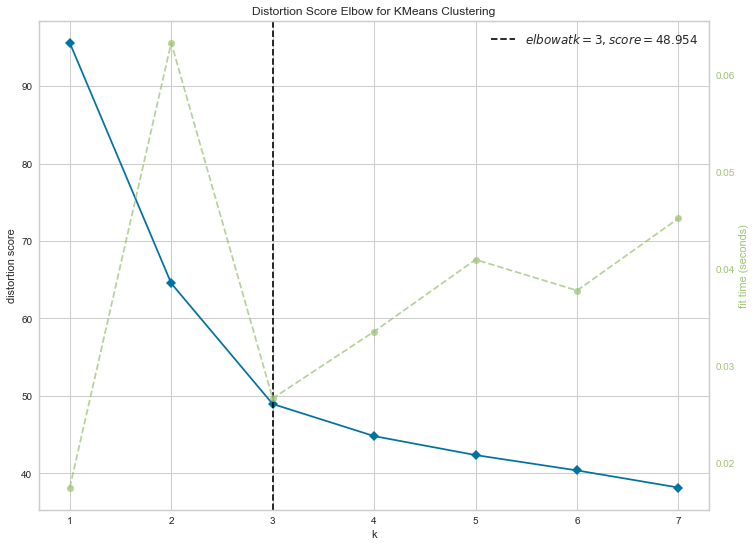

In [9]:
# Elbow method

plt.figure(figsize=(12,9))

# Now we apply KMeans
model = KMeans()

# we want first to find out how many clusters using the elbow technique
visualizer = KElbowVisualizer(model, k=(1,8))
visualizer.fit(X_scaled)       
visualizer.show()


# we know that there are 3 wine types (target=[0,1,2]) 
# and the elbow method correctely chooses 3

<Figure size 864x648 with 0 Axes>

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c196a2b90>,
                     colors='yellowbrick', is_fitted='auto', model=None)

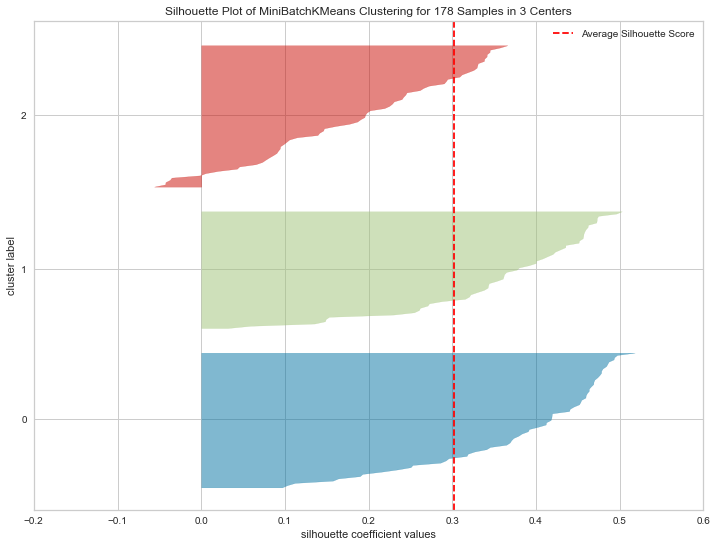

In [10]:
# Now we use Silhoutte to visualize the compactness of the clusters

plt.figure(figsize=(12,9))

#model = KMeans(3)
#model=MiniBatchKMeans(n_clusters=3, verbose=True).fit(X_scaled)

model=MiniBatchKMeans(n_clusters=3).fit(X_scaled)


visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled)      
visualizer.show()


In [11]:
# A: mirar los tiempos que tarda cada uno para comparar. Curioso: minibatch no necesariamente menos tiempo... 
# mirar con iteraciones quizá cambia.

#import time
#miniini=[]
#kini=[]
#kfin=[]
#for i in range(0,1000):
    
    #miniini.append(time.time())# tiempo de ahora
    #model=MiniBatchKMeans(n_clusters=3).fit(X_scaled)
    #kini.append(time.time())
    #model=KMeans(n_clusters=3).fit(X_scaled)
    #kfin.append(time.time())

In [12]:
#print(np.mean(np.subtract(kini,miniini)))
#print(np.mean(np.subtract(kfin,kini)))

# por tanto el minibatch sí que es un poco más rápido.

<Figure size 864x648 with 0 Axes>

InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c1a4a6850>,
                     embedding='mds', is_fitted='auto', legend=True,
                     legend_loc='lower left', legend_size=1.5, max_size=25000,
                     min_size=10000, model=None, random_state=None,
                     scoring='membership')

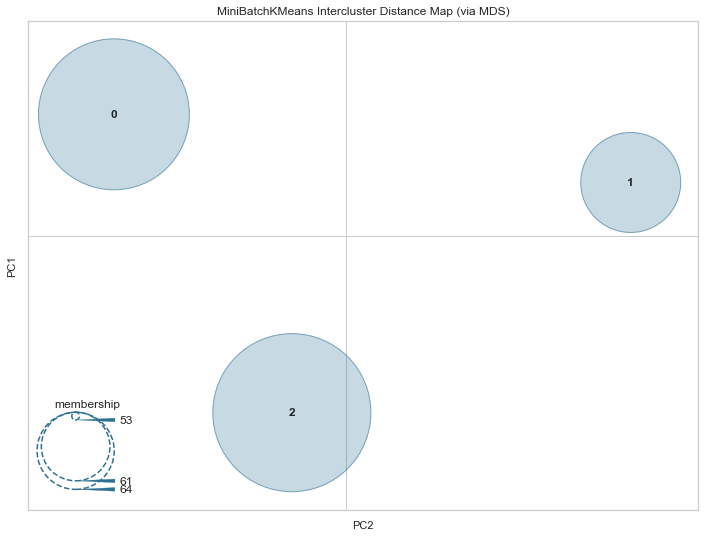

In [13]:
# Inter cluster distance 
plt.figure(figsize=(12,9))

#model=MiniBatchKMeans(n_clusters=3).fit(X_scaled)

visualizer = InterclusterDistance(model, min_size=10000)
#visualizer = InterclusterDistance(model)
visualizer.fit(X_scaled)
visualizer.show()

# Hace PCA con el algoritmo.
# En model teníamos el KMeans de antes.

<Figure size 864x648 with 0 Axes>

/Users/alfred/Documents/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LearningCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c1a6c1690>,
              cv=None, exploit_incremental_learning=False, groups=None,
              model=None, n_jobs=1, pre_dispatch='all', random_state=None,
              scoring='adjusted_rand_score', shuffle=False,
              train_sizes=array([0.1  , 0.325, 0.55 , 0.775, 1.   ]))

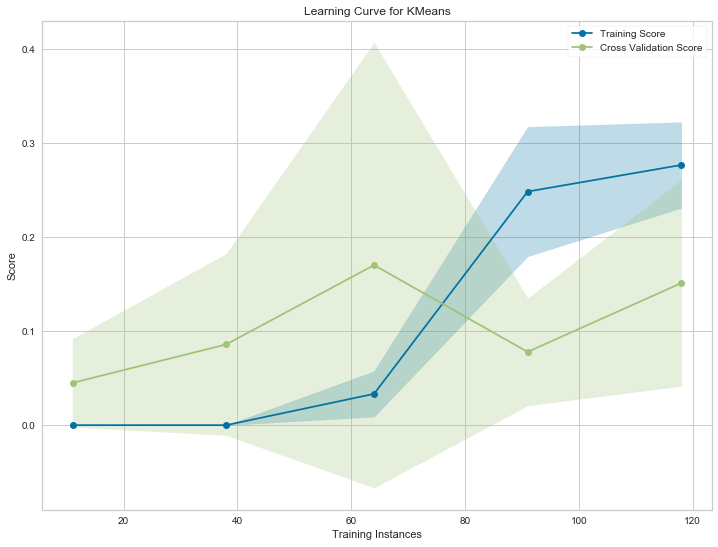

In [14]:
# Learning Curve

plt.figure(figsize=(12,9))

model = KMeans()

visualizer = LearningCurve(model, scoring="adjusted_rand_score")

visualizer.fit(X_scaled, y)        # Fit the data to the visualizer
visualizer.show()                  # Finalize and render the figure

In [15]:
# Can we calculate accuracy ???

#model=KMeans(3)
model=MiniBatchKMeans(n_clusters=3)

model.fit(X_scaled)

print("Predicted labels ----")
print(model.predict(X_scaled)) # es mi X_train y X_test porque no separado
print()
print("Actual    labels ----")
print(y.values) 
print()

print(" ---- Watch the labels ----")

acc_score=accuracy_score(y.values,model.predict(X_scaled)) # y_train y y_predicted
print(f'Accuracy {acc_score*100:.3f}')


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=3, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

Predicted labels ----
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 1 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Actual    labels ----
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]

 ---- Watch the labels ----
Accuracy 35.393


<h3>Silhouette score</h3>

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). 

The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. 

If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
<p style="margin-left:200px"><b>
    a : mean distance between a sample and all other points in the same class. <br>
    b : mean distance between a sample and all other points in the next nearest cluster.
</b></p>
<br>
<p><b>
$$\large{s=\frac{b-a}{max(a,b}}$$
</b></p>

In [16]:
# Silhouette score

from sklearn import metrics

she=metrics.silhouette_score(X_scaled, model.labels_, metric="euclidean")
print(f'Silhouette score {she:5f}')

# sería con X_test en caso de que lo tuviera separado. En unsupervised no es tan importante la...
#... división porque no tenemos con qué compararlo.

# model.labels_ --> el KMeans te da labels y accedes a ellas mediante... scikit learn para...
# ... acceder a atributos de clase.
# la otra métrica que admite es Manhattan.

Silhouette score 0.301350


In [17]:
# Centroids

model.labels_ # accedemos a atributos de una clase de scikit learn del KMeans de antes.
model.cluster_centers_ # me da los centroides

pd.DataFrame(model.cluster_centers_, columns=X.columns)
# en esta table tengo los valores de los vectores de los centroides.

# BECAUSE WE SCALED WE HAVE TO BRING IT BACK TO THE ORIGINAL RANGES

pd.DataFrame(x_scaled_fit.inverse_transform(model.cluster_centers_),columns=X.columns)
             
# --- Now with these values we can have an interpretation of what each cluster means ---
# Se puede saber porque pones column sin argumento? Tienes qiue poner columns = X.columns !!!!!



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

array([[0.70521201, 0.25306219, 0.58834867, 0.34796547, 0.41471424,
        0.64361521, 0.55442367, 0.30422028, 0.48499627, 0.36076171,
        0.47935879, 0.68300133, 0.59556766],
       [0.54794408, 0.50972317, 0.56642714, 0.55436534, 0.31196926,
        0.23696121, 0.10241957, 0.5912441 , 0.23501577, 0.49540216,
        0.17012195, 0.15303056, 0.24370458],
       [0.31719737, 0.22391304, 0.46786988, 0.48675258, 0.25335145,
        0.4574023 , 0.37376231, 0.42374214, 0.38630389, 0.1446132 ,
        0.48853659, 0.56766178, 0.15692701]])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.705212,0.253062,0.588349,0.347965,0.414714,0.643615,0.554424,0.304220,0.484996,0.360762,0.479359,0.683001,0.595568
1,0.547944,0.509723,0.566427,0.554365,0.311969,0.236961,0.102420,0.591244,0.235016,0.495402,0.170122,0.153031,0.243705
2,0.317197,0.223913,0.467870,0.486753,0.253351,0.457402,0.373762,0.423742,0.386304,0.144613,0.488537,0.567662,0.156927


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.709806,2.020495,2.460212,17.350530,108.153710,2.846484,2.967968,0.291237,1.947438,5.508127,1.069611,3.134594,1112.985866
1,13.112187,3.319199,2.419219,21.354688,98.701172,1.667187,0.825469,0.443359,1.155000,7.086113,0.689250,1.687773,619.673828
2,12.235350,1.873000,2.234917,20.043000,93.308333,2.306467,2.111633,0.354583,1.634583,2.974867,1.080900,2.819717,498.011667


<h1>Agglomerative Hierarchical Clustering</h1>

Agglomerative hierarchical clustering differs from k-means in a key way. 
Rather than choosing a number of clusters and starting out with random centroids, we instead begin 
with every point in our dataset as a “cluster.” Then we  nd the two closest points and combine them into a cluster. 
Then, we  nd the next closest points, and those become a cluster. 

We repeat the process until we only have one big giant cluster.

<img src="dendrogram.png">

<Figure size 1224x648 with 0 Axes>

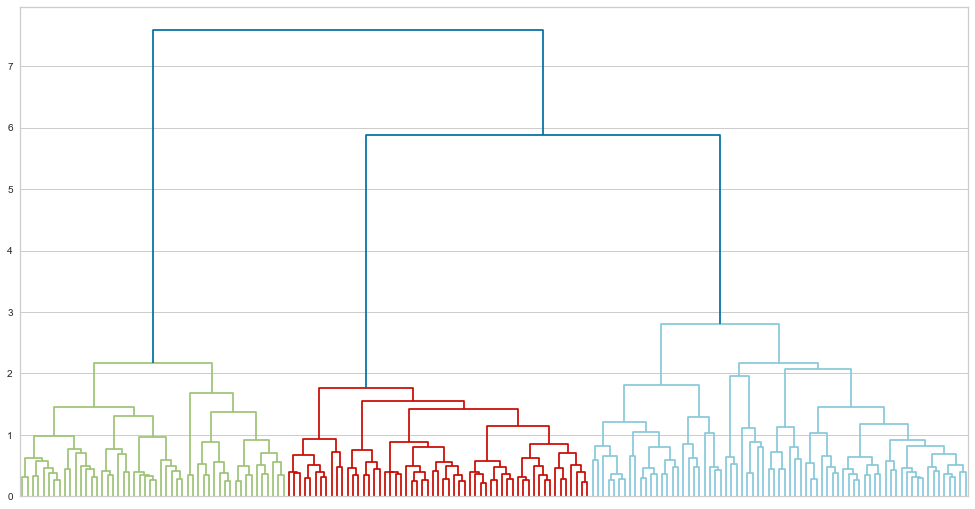

predictions --- 


array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

labels --- 


array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

pre-assigned labels --- 


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

Accuracy 97.753


In [18]:
 # import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(17,9))

# create dendrogram
dn = sch.dendrogram(sch.linkage(X_scaled, method='ward'), no_labels=True)
plt.show()

# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

# save clusters for chart y_hc = hc.fit_predict(points)
print("predictions --- ")
y_hc = hc.fit_predict(X_scaled)
y_hc

print("labels --- ")
hc.labels_

print("pre-assigned labels --- ")
y.values

dk={0:2,1:0,2:1}
acc_score=accuracy_score(list(map(lambda x:dk[x],y.values)),hc.labels_)
print(f'Accuracy {acc_score*100:.3f}')


<b><font color="red" size=6>Mission 1</font>

a) Cluster Europe using the EUindicators dataset and explain the clusterization using the centroids.<br><br>
b) Same for the credit card dataset. 
<br><br>
</b>

,Country,Construction_Confidence_Indicator,Consumer_Confidence_Indicator,Industrial_Confidence_Indicator,Retail_Confidence_Indicator,Service_Confidence_Indicator,Business_Confidence_Indicator_avg
0,Czech Republic,-19.7,3.5,3.1,19.8,33.1,9.075
1,Germany,-2.2,0.9,1.0,-3.7,18.5,3.400
2,Denmark,-4.3,15.0,-3.9,8.5,8.2,2.125
3,Finland,-4.0,14.9,-3.0,-4.7,11.0,-0.175
4,Luxembourg,5.2,6.7,-15.7,-5.7,NaN,-5.400


,Construction_Confidence_Indicator,Consumer_Confidence_Indicator,Industrial_Confidence_Indicator,Retail_Confidence_Indicator,Service_Confidence_Indicator,Business_Confidence_Indicator_avg
0,-19.7,3.5,3.1,19.8,33.1,9.075
1,-2.2,0.9,1.0,-3.7,18.5,3.400
2,-4.3,15.0,-3.9,8.5,8.2,2.125
3,-4.0,14.9,-3.0,-4.7,11.0,-0.175
5,4.4,2.3,4.7,6.1,28.4,10.900


,Construction_Confidence_Indicator,Consumer_Confidence_Indicator,Industrial_Confidence_Indicator,Retail_Confidence_Indicator,Service_Confidence_Indicator,Business_Confidence_Indicator_avg
0,0.418719,0.840056,0.810651,1.000000,1.000000,0.752277
1,0.706076,0.803894,0.686391,0.126394,0.569322,0.545537
2,0.671593,1.000000,0.396450,0.579926,0.265487,0.499089
3,0.676519,0.998609,0.449704,0.089219,0.348083,0.415301
4,0.814450,0.823366,0.905325,0.490706,0.861357,0.818761


<Figure size 864x648 with 0 Axes>

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c1ae8de10>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

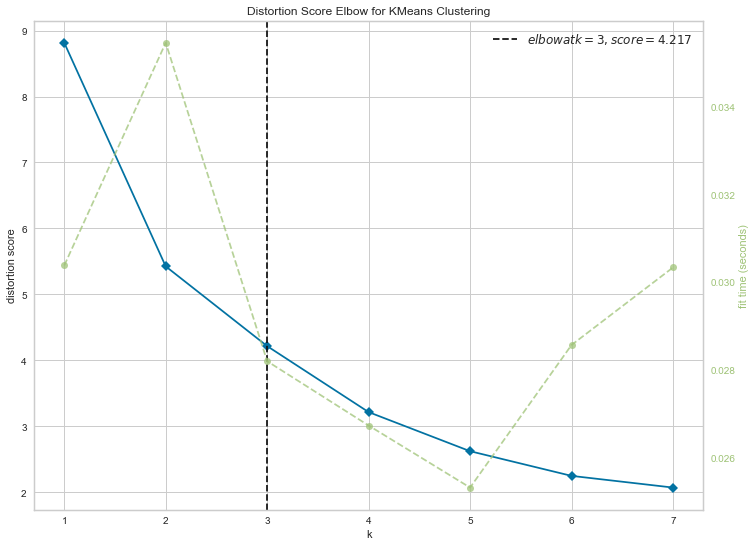

<Figure size 864x648 with 0 Axes>

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c1a915cd0>,
                     colors='yellowbrick', is_fitted='auto', model=None)

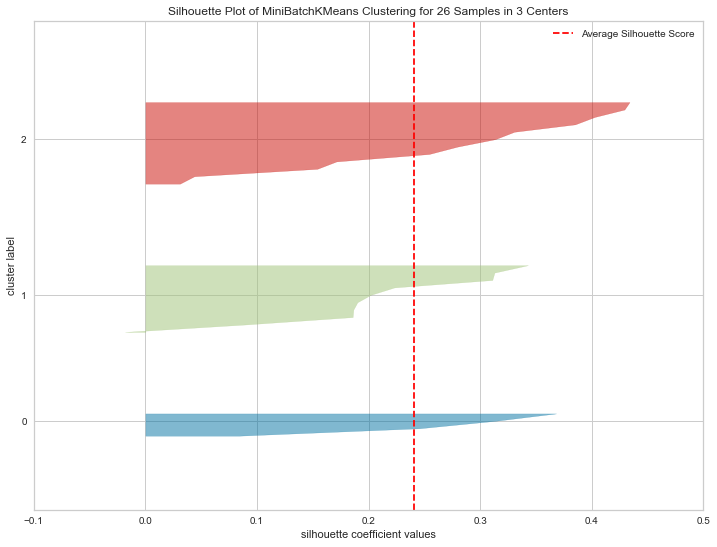

<Figure size 864x648 with 0 Axes>

InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c1b0320d0>,
                     embedding='mds', is_fitted='auto', legend=True,
                     legend_loc='lower left', legend_size=1.5, max_size=25000,
                     min_size=4, model=None, random_state=None,
                     scoring='membership')

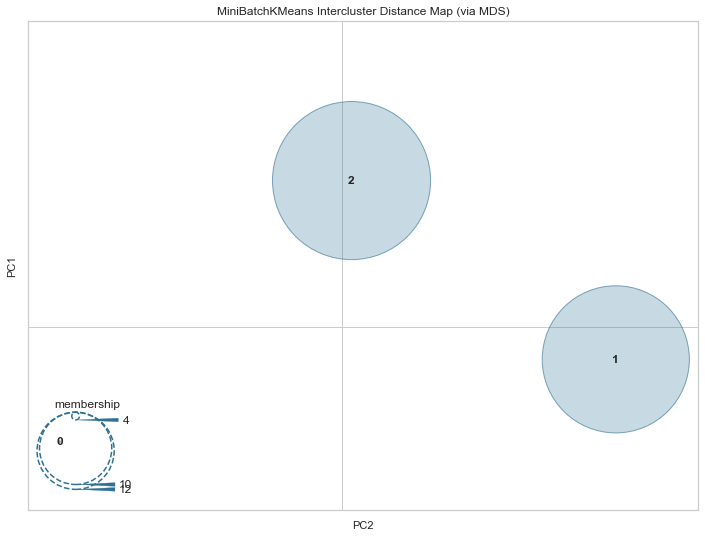

Silhouette score 0.240881


array([0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1,
       2, 0, 2, 2], dtype=int32)

array([[0.71834379, 0.83039341, 0.88494122, 0.84858261, 0.81734305,
        0.8364066 ],
       [0.37676224, 0.62133109, 0.38078455, 0.23193471, 0.28627085,
        0.25431425],
       [0.58143156, 0.68674011, 0.72055216, 0.58948867, 0.32116995,
        0.5185011 ]])

,Construction_Confidence_Indicator,Consumer_Confidence_Indicator,Industrial_Confidence_Indicator,Retail_Confidence_Indicator,Service_Confidence_Indicator,Business_Confidence_Indicator_avg
0,0.718344,0.830393,0.884941,0.848583,0.817343,0.836407
1,0.376762,0.621331,0.380785,0.231935,0.286271,0.254314
2,0.581432,0.686740,0.720552,0.589489,0.321170,0.518501


,Construction_Confidence_Indicator,Consumer_Confidence_Indicator,Industrial_Confidence_Indicator,Retail_Confidence_Indicator,Service_Confidence_Indicator,Business_Confidence_Indicator_avg
0,-1.452863,2.805286,4.355507,15.726872,26.907930,11.384361
1,-22.255179,-12.226295,-4.164741,-0.860956,8.904582,-4.594074
2,-9.790818,-7.523386,1.577331,8.757245,10.087661,2.657855


In [19]:
# A) Cluster Europe using the EUindicators dataset and explain the clusterization using the centroids.
# I will be using KMeans and not the MiniBatchKMeans because the dataset is tiny, so no need to decrease computational cost...
# ... and I prefer to prioritize in this case precision instead of velocity, so KMeans.

# Import dataset (pd and all the packages of this first stage are already imported above)
# I changed the names of the attributes in the Excel document to avoid blank spaces and substituted them with underscores.
# Had problems reading the Excel document and decided to create a list with the attributes names first.
names_columns = ['Country','Construction_Confidence_Indicator','Consumer_Confidence_Indicator', 'Industrial_Confidence_Indicator', 'Retail_Confidence_Indicator', 'Service_Confidence_Indicator','Business_Confidence_Indicator_avg']
europe = pd.read_excel('EUIndicators-2014-2018.xlsx', names=names_columns)
europe.head() # check
# type(europe['Consumer_Confidence_Indicator'][0]) # checked that besides the 'Country' column, the rest are numpy floats, one by one
# just in case, to make sure no later errors arise:
europe.Construction_Confidence_Indicator= pd.to_numeric(europe.Construction_Confidence_Indicator, errors='coerce')
europe.Consumer_Confidence_Indicator= pd.to_numeric(europe.Consumer_Confidence_Indicator, errors='coerce')
europe.Industrial_Confidence_Indicator= pd.to_numeric(europe.Industrial_Confidence_Indicator, errors='coerce')
europe.Retail_Confidence_Indicator= pd.to_numeric(europe.Retail_Confidence_Indicator, errors='coerce')
europe.Service_Confidence_Indicator= pd.to_numeric(europe.Service_Confidence_Indicator, errors='coerce')
europe.Business_Confidence_Indicator_avg= pd.to_numeric(europe.Business_Confidence_Indicator_avg, errors='coerce')
# Get rid of NaN: will only affect Ireland and Luxembourg. The dataset is tiny already, but better w/o NaN to ensure clustering works well
europe.dropna(inplace=True)
# europe.head() # to check
# Also, I will set a new df withouth the 'Country' column, since it has str type and would not work for distances
europe_num = europe.copy(deep=True) # make a deep copy of the df w/o the column 'Country', only the numerical attributes
    # When deep=True (default), a new object will be created with a copy of the calling object’s data and indices...
    #...Modifications to the data or indices of the copy will not be reflected in the original object (see notes below).
europe_num.drop(columns='Country',inplace=True)
europe_num.head()


# Rescaling
# Clustering works measuring distances, therefore we need to rescale (normally between 0..1) all the attributes.
min_max_scaler = preprocessing.MinMaxScaler()  # by default between 0 and 1

europe_num_scaled_fit = min_max_scaler.fit(europe_num)

europe_num_scaled = min_max_scaler.fit_transform(europe_num)
Europe_num_scaled = pd.DataFrame(europe_num_scaled,columns=europe_num.columns) # df to see better the array
Europe_num_scaled.head()

# Elbow method
# Finding out the best number of clusters. For this the elbow method with KMeans as model. (No need for imports, they are above)
plt.figure(figsize=(12,9))
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,8))
visualizer.fit(Europe_num_scaled)       
visualizer.show()
# although it comes out like 3, since the slope for between 3 & 4 is still quite steep...
# ...I would go for 3 clusters. Even though later on with the Inter Cluster I can see distance enough between the 3 centroids.


# Now we use Silhoutte to visualize the compactness of the clusters, the goodness. With MiniBatchKmeans

plt.figure(figsize=(12,9))
model=MiniBatchKMeans(n_clusters=3).fit(Europe_num_scaled) 
# used also n_clusters=4, since the number of cases in each cluster is little (due to the tiny dataset), I will opt for 3
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(Europe_num_scaled)      
visualizer.show()

# I will also do the Inter Cluster one, to see the number of cases in each cluster, and the difference between centroids.
plt.figure(figsize=(12,9))
visualizer = InterclusterDistance(model, min_size=4) # the tiniest cluster has 4, therefore I set this as a minimum 
    #... to continues with 3 clusters.
#visualizer = InterclusterDistance(model)
visualizer.fit(Europe_num_scaled)
visualizer.show()

# Silhouette score
from sklearn import metrics
she=metrics.silhouette_score(Europe_num_scaled, model.labels_, metric="euclidean")
print(f'Silhouette score {she:5f}')
# the score is 0.241567 with 3 clusters
# the score is 0.217561 with 4 clusters, even worse. So keep it to three clusters.

# Centroids: look for the vector for each of the centroids and rescale it back to orginal
# Since I instantiated the KMeans for this exercise as 'model', I can reuse the code of the theory above.


model.labels_ # access an attribute of a class in scikit learn with this type of syntax
model.cluster_centers_ # gives the centroids
pd.DataFrame(model.cluster_centers_, columns=europe_num.columns) # in this df I have the value of the centroids' vectors.
# Rescaling
pd.DataFrame(europe_num_scaled_fit.inverse_transform(model.cluster_centers_),columns=europe_num.columns)



# Un altre cop falten els noms!!!!!! Però què estem fent?!?!?!?!?!?!?



In [20]:
# B) CREDIT CARDS

In [21]:
# Import dataset
cc = pd.read_csv('CCData.csv')
# cc.columns.values # check that I do not need to specify the names of the columns because it already gets it.
cc.head()
# type(cc['CASH ADVANCE'][1]) some values give back errors and are not floats. To prevent mistakes, I will convert every column
cc.BALANCE= pd.to_numeric(cc.BALANCE, errors='coerce')
cc.BALANCE_FREQUENCY= pd.to_numeric(cc.BALANCE_FREQUENCY, errors='coerce')
cc.PURCHASES= pd.to_numeric(cc.PURCHASES, errors='coerce')
cc.ONEOFF_PURCHASES= pd.to_numeric(cc.ONEOFF_PURCHASES, errors='coerce')
cc.INSTALLMENTS_PURCHASES= pd.to_numeric(cc.INSTALLMENTS_PURCHASES, errors='coerce')
cc.CASH_ADVANCE= pd.to_numeric(cc.CASH_ADVANCE, errors='coerce')
cc.PURCHASES_FREQUENCY= pd.to_numeric(cc.PURCHASES_FREQUENCY, errors='coerce')
cc.ONEOFF_PURCHASES_FREQUENCY= pd.to_numeric(cc.ONEOFF_PURCHASES_FREQUENCY, errors='coerce')
cc.PURCHASES_INSTALLMENTS_FREQUENCY= pd.to_numeric(cc.PURCHASES_INSTALLMENTS_FREQUENCY, errors='coerce')
cc.CASH_ADVANCE_FREQUENCY= pd.to_numeric(cc.CASH_ADVANCE_FREQUENCY, errors='coerce')
cc.CASH_ADVANCE_TRX= pd.to_numeric(cc.CASH_ADVANCE_TRX, errors='coerce')
cc.PURCHASES_TRX= pd.to_numeric(cc.PURCHASES_TRX, errors='coerce')
cc.CREDIT_LIMIT= pd.to_numeric(cc.CREDIT_LIMIT, errors='coerce')
cc.PAYMENTS= pd.to_numeric(cc.PAYMENTS, errors='coerce')
cc.MINIMUM_PAYMENTS= pd.to_numeric(cc.MINIMUM_PAYMENTS, errors='coerce')
cc.PRC_FULL_PAYMENT= pd.to_numeric(cc.PRC_FULL_PAYMENT, errors='coerce')
cc.TENURE= pd.to_numeric(cc.TENURE, errors='coerce')
# get rid of NaN (the dataset has enough samples that will not be greatly affected by removing NaNs directly)
cc.dropna(inplace=True)
# Gt rid of the customer id column, since I do not want the clusters to be affected by this attribute.
cc_num = cc.copy(deep=True) # make a deep copy of the df w/o the column 'CUST_ID', only the numerical attributes
    # When deep=True (default), a new object will be created with a copy of the calling object’s data and indices...
    #...Modifications to the data or indices of the copy will not be reflected in the original object (see notes below).
cc_num.drop(columns='CUST_ID',inplace=True)
cc_num.head()
cc_num.shape # to check that even though I got rid of NaNs, the number of samples is still of a relevant size.

# Rescaling
# Clustering works measuring distances, therefore we need to rescale (normally between 0..1) all the attributes.
min_max_scaler = preprocessing.MinMaxScaler()  # by default between 0 and 1

cc_num_scaled_fit = min_max_scaler.fit(cc_num)

cc_num_scaled = min_max_scaler.fit_transform(cc_num)
Cc_num_scaled = pd.DataFrame(cc_num_scaled,columns=cc_num.columns) # df to see better the array
Cc_num_scaled.head()




,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


(8636, 17)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003978,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080892,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012263,0.008210,0.000000,1.0
3,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013373,0.003204,0.000000,1.0
4,0.095038,1.000000,0.027188,0.000000,0.059257,0.000000,0.666667,0.000000,0.583333,0.000000,0.00000,0.022346,0.058431,0.027602,0.031506,0.000000,1.0


<Figure size 864x648 with 0 Axes>

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c1af8b610>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

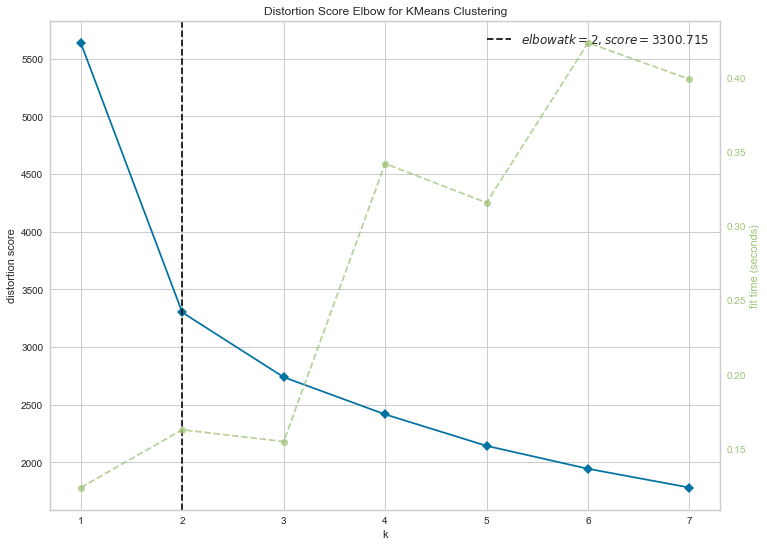

In [22]:
# Elbow method
# Finding out the best number of clusters. For this the elbow method with KMeans as model. (No need for imports, they are above)
    # I will use KMeans (instead of MiniBatchKMeans) even though this dataset is much bigger than the previous exercise...
    # ... because it is still manageable with my computer and would prefer not to sacrifice precision.
plt.figure(figsize=(12,9))
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,8))
visualizer.fit(Cc_num_scaled)       
visualizer.show()
    # In this case the decision would be between 2 or 3 clusters based on the KElbowVisualizer results' graph.
    # For this, I will try the Silhouette and the Inter Cluster for both cases, and then choose based on the results.



<Figure size 864x648 with 0 Axes>

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x102615890>,
                     colors='yellowbrick', is_fitted='auto', model=None)

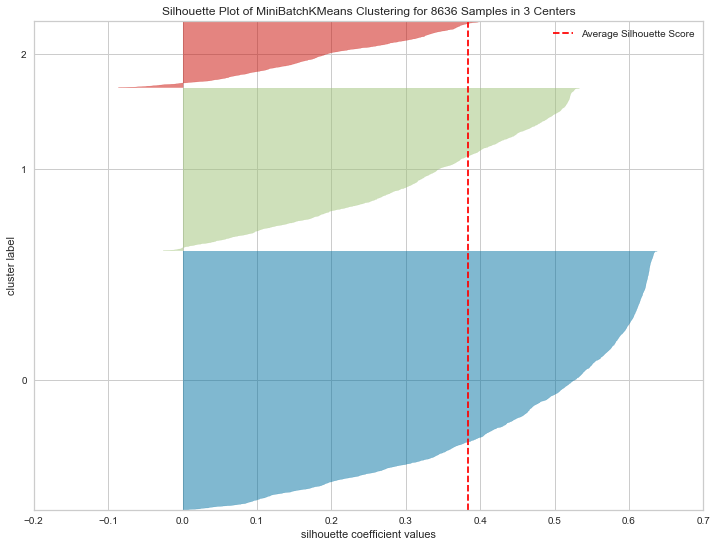

<Figure size 864x648 with 0 Axes>

InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c194480d0>,
                     embedding='mds', is_fitted='auto', legend=True,
                     legend_loc='lower left', legend_size=1.5, max_size=25000,
                     min_size=1000, model=None, random_state=None,
                     scoring='membership')

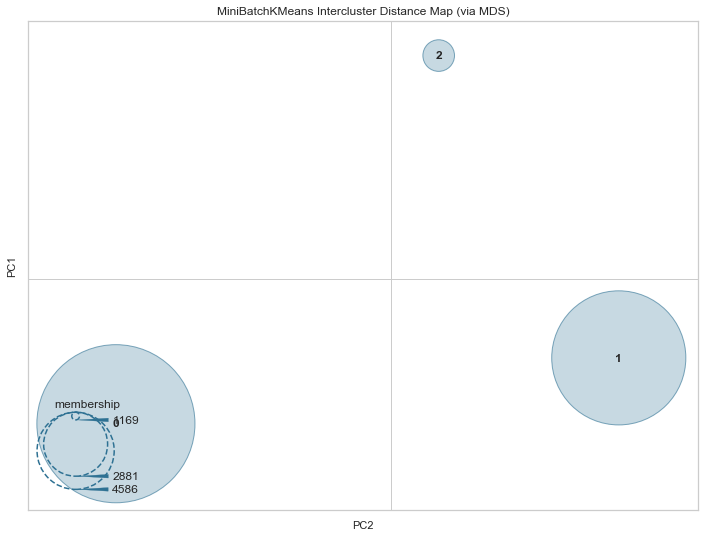

In [23]:
# FOR 3: 
# Now we use Silhoutte to visualize the compactness of the clusters, the goodness. With MiniBatchKmeans (to be quick)
plt.figure(figsize=(12,9))
model=MiniBatchKMeans(n_clusters=3).fit(Cc_num_scaled) 
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(Cc_num_scaled)      
visualizer.show()
# I will also do the Inter Cluster one, to see the number of cases in each cluster, and the difference between centroids.
plt.figure(figsize=(12,9))
visualizer = InterclusterDistance(model, min_size=1000) # the tiniest cluster has 1515, therefore I set this as a minimum 
 #visualizer = InterclusterDistance(model)
visualizer.fit(Cc_num_scaled)
visualizer.show()



<Figure size 864x648 with 0 Axes>

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c1ad95150>,
                     colors='yellowbrick', is_fitted='auto', model=None)

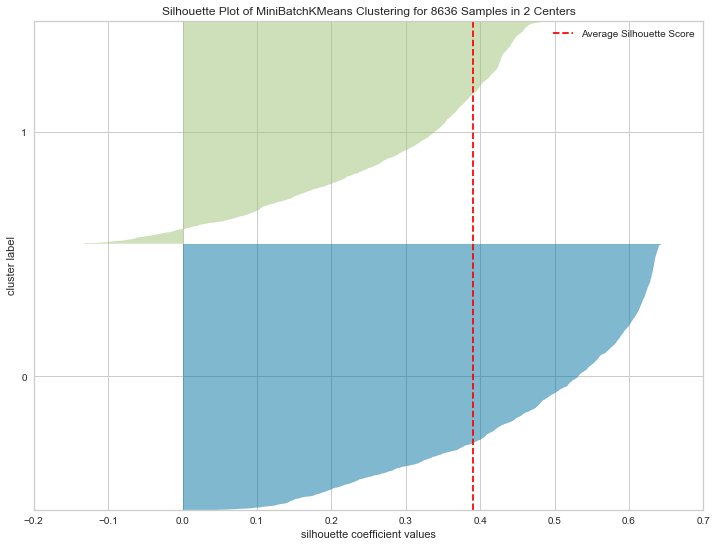

In [24]:
# FOR 2:
# Now we use Silhoutte to visualize the compactness of the clusters, the goodness. With MiniBatchKmeans (to be quick)
plt.figure(figsize=(12,9))
model=MiniBatchKMeans(n_clusters=2).fit(Cc_num_scaled) 
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(Cc_num_scaled)      
visualizer.show()



<Figure size 864x648 with 0 Axes>

InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c1a26c6d0>,
                     embedding='mds', is_fitted='auto', legend=True,
                     legend_loc='lower left', legend_size=1.5, max_size=25000,
                     min_size=1000, model=None, random_state=None,
                     scoring='membership')

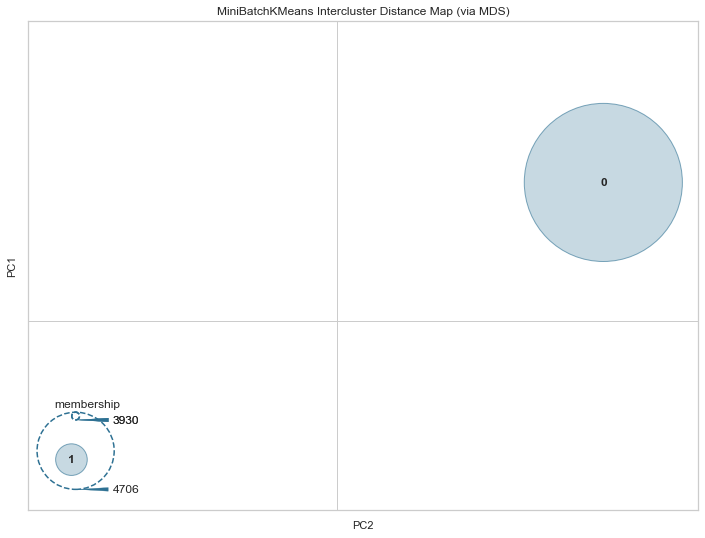

In [25]:
# Inter Cluster
plt.figure(figsize=(12,9))
visualizer = InterclusterDistance(model, min_size=1000) # the tiniest cluster has 4, therefore I set this as a minimum 
visualizer.fit(Cc_num_scaled)
visualizer.show()



<Figure size 864x648 with 0 Axes>

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c1a43b050>,
                     colors='yellowbrick', is_fitted='auto', model=None)

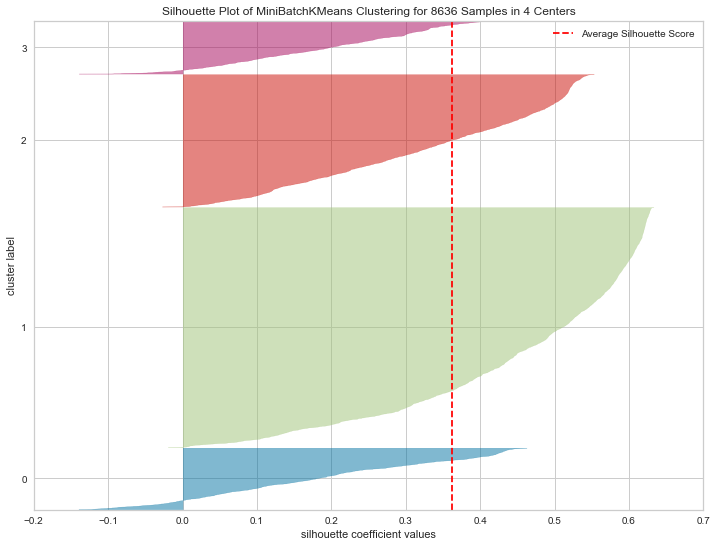

In [26]:
# FOR 4  (just to check):
# Now we use Silhoutte to visualize the compactness of the clusters, the goodness. With MiniBatchKmeans (to be quick)
plt.figure(figsize=(12,9))
model=MiniBatchKMeans(n_clusters=4).fit(Cc_num_scaled) 
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(Cc_num_scaled)      
visualizer.show()



<Figure size 864x648 with 0 Axes>

InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c1ae25bd0>,
                     embedding='mds', is_fitted='auto', legend=True,
                     legend_loc='lower left', legend_size=1.5, max_size=25000,
                     min_size=1000, model=None, random_state=None,
                     scoring='membership')

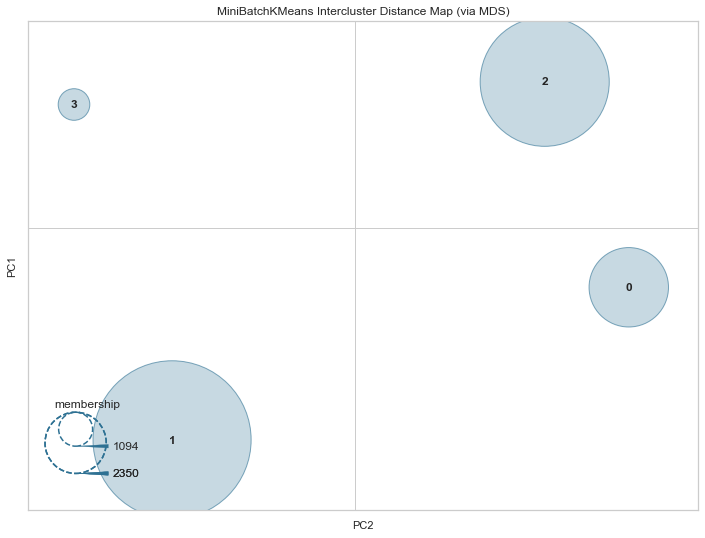

In [27]:
# Inter Cluster
plt.figure(figsize=(12,9))
visualizer = InterclusterDistance(model, min_size=1000) # the tiniest cluster has 4, therefore I set this as a minimum 
visualizer.fit(Cc_num_scaled)
visualizer.show()




In [28]:
# FINAL DECISION: 3 CLUSTERS. Even though one of them is substantially different from the other two in terms of...
# ... number of cases and the euclidean distance between the furthest point of the centroid and the centroid...
#... the InterCluster shows that the 3 centroids are far away enough among them.
# But just to make sure I will check with the Silhouette score that there is no relevant difference between 2 and 3 clusters.


# Silhouette score
model=MiniBatchKMeans(n_clusters=3).fit(Cc_num_scaled) # again, so it takes the correct one for the score
from sklearn import metrics
she=metrics.silhouette_score(Cc_num_scaled, model.labels_, metric="euclidean")
print(f'Silhouette score for 3 {she:5f}')

# The Silhouette score for 3 clusters is 0.37
# The Silhouette score for 2 clusters is 0.38
# Since the difference is minimum between both, I will still stick to 3 clusters even though is lower than for 2.

# Silhouette score
model=MiniBatchKMeans(n_clusters=2).fit(Cc_num_scaled) # again, so it takes the correct one for the score
from sklearn import metrics
she=metrics.silhouette_score(Cc_num_scaled, model.labels_, metric="euclidean")
print(f'Silhouette score for 2 {she:5f}')

Silhouette score for 3 0.370000
Silhouette score for 2 0.391535


In [29]:
# Centroids: look for the vector for each of the centroids and rescale it back to orginal
# Since I instantiated the KMeans for this exercise as 'model', I can reuse the code of the theory above.

model.labels_ # access an attribute of a class in scikit learn with this type of syntax
model.cluster_centers_ # gives the centroids
pd.DataFrame(model.cluster_centers_, columns=cc_num.columns) # in this df I have the value of the centroids' vectors.
# Rescaling
pd.DataFrame(cc_num_scaled_fit.inverse_transform(model.cluster_centers_),columns=cc_num.columns)



array([1, 1, 0, ..., 0, 1, 1], dtype=int32)

array([[0.07565559, 0.94605454, 0.03765682, 0.02371015, 0.03912278,
        0.01100299, 0.9025993 , 0.32420002, 0.75385737, 0.05153844,
        0.01597888, 0.08416915, 0.16074775, 0.03986276, 0.01151779,
        0.25925645, 0.93268028],
       [0.09380204, 0.8593588 , 0.00779144, 0.0075207 , 0.00337017,
        0.02852969, 0.18164174, 0.10639172, 0.07468452, 0.12589655,
        0.03567168, 0.01024539, 0.13654346, 0.03032346, 0.01137749,
        0.07555832, 0.90508438]])

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.075656,0.946055,0.037657,0.023710,0.039123,0.011003,0.902599,0.324200,0.753857,0.051538,0.015979,0.084169,0.160748,0.039863,0.011518,0.259256,0.932680
1,0.093802,0.859359,0.007791,0.007521,0.003370,0.028530,0.181642,0.106392,0.074685,0.125897,0.035672,0.010245,0.136543,0.030323,0.011377,0.075558,0.905084


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1440.719902,0.946055,1846.674435,966.455519,880.262451,518.650463,0.902599,0.324200,0.753857,0.077308,1.965402,30.132555,4864.395013,2021.946079,880.049835,0.259256,11.596082
1,1786.285241,0.859359,382.089062,306.552935,75.828784,1344.809971,0.181642,0.106392,0.074685,0.188845,4.387617,3.667849,4139.476513,1538.098791,869.330116,0.075558,11.430506
